In [1]:
#Statistical analysis of neighbor_list_analysis defects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
import seaborn as sns

In [213]:
path1='/home/heruhe/Desktop/Ga2o3/Frenkelpair/FP_beta/npt/Ga/out'
os.chdir(path1)

In [223]:
df=pd.read_csv('data.lastframe_0',skiprows=18,sep=' ',nrows=1280,header=None)
sx=24.2998
sy=24.773
sz=23.6007
df.columns=['id','type','x','y','z','p1','p2','p3']
for i in range(1280):
    if df['x'].iloc[i]<0.2:
        df['x'].iloc[i]=df['x'].iloc[i]+sx
    if df['y'].iloc[i]<0.2:
        df['y'].iloc[i]=df['y'].iloc[i]+sy    
    if df['z'].iloc[i]<0.2:
        df['z'].iloc[i]=df['z'].iloc[i]+sz        

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [218]:
dfGa1=df[df['type']==1]
dfGa2=df[df['type']==2]
dfO1=df[df['type']==3]
dfO2=df[df['type']==4]
dfO3=df[df['type']==5]
dfO2

,id,type,x,y,z,p1,p2,p3
1,75,4,24.264216,4.544039,1.352741,1,0,0
2,55,4,24.261989,1.574173,1.555960,1,0,0
8,70,4,12.095079,4.565166,1.356683,0,0,0
9,355,4,12.068619,4.531766,10.335069,0,0,0
11,29,4,5.920867,2.965716,23.711250,0,0,0
...,...,...,...,...,...,...,...,...
1259,1276,4,18.287880,21.651870,23.544384,0,0,0
1266,1249,4,18.216678,18.643960,20.661460,0,0,0
1268,1269,4,18.301238,21.676357,20.706146,0,0,0
1271,1256,4,18.259940,18.592326,23.405492,0,0,0


,x,y,z
0,1.879199,1.504840,4.257072
1,1.879199,4.590424,4.257072
2,1.879199,7.706930,4.257072
3,1.879199,10.842528,4.257072
4,1.879199,13.932899,4.257072
...,...,...,...
291,22.340208,10.814361,25.120175
292,22.340208,13.903542,25.120175
293,22.340208,17.013030,25.120175
294,22.340208,20.117156,25.120175


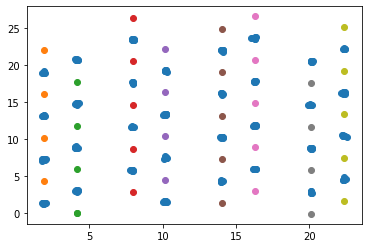

In [178]:

dfGa2=dfGa2.sort_values(by='x', ascending=True)
(n,nc)=dfGa2.shape
(n1,nc)=dfGa2[abs(dfGa2['x']-dfGa2['x'].iloc[0])<0.6].shape

nx=int(n/n1)
plt.scatter(dfGa2['x'],dfGa2['z'])
ga2_add=[]

for i in range(nx):
    add={}
    ga2=dfGa2.iloc[i*n1:(i+1)*n1,:]
    x=ga2['x'].mean()
    ga2=ga2.sort_values(by='z', ascending=True)
    #print(ga2)
    (n3,nc)=ga2[abs(ga2['z']-ga2['z'].iloc[0])<0.6].shape
    nz=int(n1/n3)
    z=np.zeros(nz)
    new_z=[]
    for j in range(nz):
        z[j]=np.mean(ga2['z'][j*n3:(j+1)*n3])
    differences = np.diff(z)
    mean_gap_z = np.mean(differences)/2
    if abs(z[0]-mean_gap_z)<0.5:
        new_z.append(z[0]-mean_gap_z)
    if z[0]-mean_gap_z>0:
        new_z.append(z[0]-mean_gap_z)
    for jj in range(nz-1):
        new_z.append((z[jj]+z[jj+1])/2)
    if abs(sz-(z[-1]+mean_gap_z))-0.5>0:
        new_z.append((z[-1]+mean_gap_z))
    #print(i,mean_gap_z,z,new_z)
    new_x=np.array([x for i in range(len(new_z))])
    #print('x',x,'z',new_z) 
    ga2=ga2.sort_values(by='y', ascending=True)
    (n4,nc)=ga2[abs(ga2['y']-ga2['y'].iloc[0])<0.6].shape
    ny=int(n1/n4)
    new_y=np.zeros(ny)
    for jjj in range(ny):
        #print(ga2['y'][jjj*n4:(jjj+1)*n4])
        new_y[jjj]=np.mean(ga2['y'][jjj*n4:(jjj+1)*n4])
    #print('y',new_y)
    add['x']=np.repeat(x, (len(new_z)*len(new_y)))
    add['y']=np.tile(new_y, len(new_z))
    add['z']=np.repeat(new_z, len(new_y))
    add_ga2=pd.DataFrame(add)
    ga2_add.append(add_ga2)


    plt.scatter(new_x,new_z)
ga2_add1=pd.concat(ga2_add, ignore_index=True)
ga2_add1

,x,y,z
0,6.030890,1.493985,1.324742
1,6.030890,4.589414,1.324742
2,6.030890,7.687085,1.324742
3,6.030890,10.791996,1.324742
4,6.030890,13.904586,1.324742
...,...,...,...
293,24.259212,9.257466,20.565705
294,24.259212,12.357811,20.565705
295,24.259212,15.458465,20.565705
296,24.259212,18.558817,20.565705


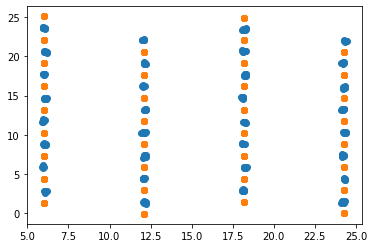

In [219]:
plt.scatter(dfO2['x'],dfO2['z'])

dfO2=dfO2.sort_values(by='x', ascending=True)
(n,nc)=dfO2.shape
(n1,nc)=dfO2[abs(dfO2['x']-dfO2['x'].iloc[0])<0.6].shape
nx=int(n/n1)
O2_add_ga2=[]

for i in range(nx):
    add={}
    O2=dfO2.iloc[i*n1:(i+1)*n1,:]
    x=O2['x'].mean()
    O2=O2.sort_values(by='z', ascending=True)
    #print(O2)
    (n3,nc)=O2[abs(O2['z']-O2['z'].iloc[0])<0.6].shape
    nz=int(n1/n3)
    z=np.zeros(nz)
    new_z=[]
    for j in range(nz):
        z[j]=np.mean(O2['z'][j*n3:(j+1)*n3])
    differences = np.diff(z)
    mean_gap_z = np.mean(differences)/2
    if abs(z[0]-mean_gap_z)<0.5:
        new_z.append(z[0]-mean_gap_z)
    if z[0]-mean_gap_z>0:
        new_z.append(z[0]-mean_gap_z)
    for jj in range(nz-1):
        new_z.append((z[jj]+z[jj+1])/2)
    if abs(sz-(z[-1]+mean_gap_z))-0.5>0:
        new_z.append((z[-1]+mean_gap_z))
    #print(i,mean_gap_z,z,new_z)
    O2=O2.sort_values(by='y', ascending=True)
    (n4,nc)=O2[abs(O2['y']-O2['y'].iloc[0])<0.6].shape
    ny=int(n1/n4)
    y=np.zeros(ny)
    new_y=[]
    for jjj in range(ny):
        y[jjj]=np.mean(O2['y'][jjj*n4:(jjj+1)*n4])
    differences = np.diff(y)
    mean_gap_y = np.mean(differences)/2
    if abs(y[0]-mean_gap_y)<0.5:
        new_y.append(y[0]-mean_gap_y)
    if y[0]-mean_gap_y>0:
        new_y.append(y[0]-mean_gap_y)
    for jjjj in range(ny-1):
        new_y.append((y[jjjj]+y[jjjj+1])/2)
    if abs(sy-(y[-1]+mean_gap_y))-0.5>0:
        new_y.append((y[-1]+mean_gap_y))
    #print('y',new_y)
    add['x']=np.repeat(x, (len(new_z)*len(new_y)))
    add['y']=np.tile(new_y, len(new_z))
    add['z']=np.repeat(new_z, len(new_y))
    add_ga2=pd.DataFrame(add)
    O2_add_ga2.append(add_ga2)


ga2_add2=pd.concat(O2_add_ga2, ignore_index=True)
plt.scatter(ga2_add2['x'],ga2_add2['z'])
ga2_add2


,id,type,x,y,z,p1,p2,p3
1,75,4,24.264216,4.544039,1.352741,1,0,0
2,55,4,24.261989,1.574173,1.555960,1,0,0
4,31,5,2.133986,2.970807,2.780952,0,0,0
5,34,3,1.983416,2.954844,23.688677,0,0,0
6,12,5,3.904601,1.425551,1.520551,0,0,0
...,...,...,...,...,...,...,...,...
1270,1014,3,14.089276,24.612920,20.779763,0,-1,0
1271,1256,4,18.259940,18.592326,23.405492,0,0,0
1273,1011,5,14.241666,24.684998,23.385527,0,-1,0
1274,689,4,18.035815,24.611104,14.653711,0,-1,0


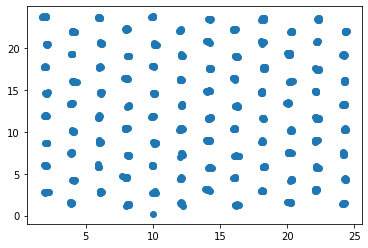

In [224]:
dfO=df[df['type']>2]
plt.scatter(dfO['x'],dfO['z'])
dfO

In [230]:
dfO=dfO.sort_values(by='x', ascending=True)
(n,nc)=dfO.shape
(n1,nc)=dfO[abs(dfO['x']-dfO['x'].iloc[0])<0.6].shape
nx=int(n/n1)
x=np.zeros(nx)
new_x=[]
for j in range(nx):
    x[j]=np.mean(dfO['x'][j*n1:(j+1)*n1])
differences = np.diff(x)
mean_gap_x = np.mean(differences)/2
if abs(x[0]-mean_gap_x)<0.5:
    new_x.append(x[0]-mean_gap_x)
if x[0]-mean_gap_x>0:
    new_x.append(x[0]-mean_gap_x)
for jj in range(nx-1):
    new_x.append((x[jj]+x[jj+1])/2)
if abs(sx-(x[-1]+mean_gap_x))-0.5>0:
    new_x.append((x[-1]+mean_gap_x))
print(j,mean_gap_x,x,new_x)
for i in range(nx):
    x=new_x[i]
    
    

11 1.0111250986111937 [ 2.01446012  3.9956087   6.03088958  8.06960736 10.04928636 12.10654163
 14.16202118 16.15214148 18.18242278 20.21311319 22.20735156 24.25921229] [1.0033350172692725, 3.005034406947953, 5.013249137966017, 7.050248467355741, 9.059446856491022, 11.077913994447666, 13.13428140800584, 15.157081332361878, 17.16728212900716, 19.197767984297684, 21.210232374993502, 23.233281921656214, 25.27033738393792]
